In [3]:
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from pickle import dump,load
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras.models import load_model

In [6]:

text = read_file('./machado_preprocessed.txt')
tokens = text.split(" ")
#  tokens.pop(0)

In [5]:
def read_file(filepath):
	with open(filepath) as f:
		str_text = f.read()
	return str_text

In [7]:
train_len = 4
text_sequences = []
for i in range(train_len,len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

In [8]:
sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1
        

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences) 

#Collecting some information   
unique_words = tokenizer.index_word
unique_wordsApp = tokenizer.word_counts
vocabulary_size = len(tokenizer.word_counts)

In [10]:
n_sequences = np.empty([len(sequences),train_len], dtype='int32')
for i in range(len(sequences)):
    n_sequences[i] = sequences[i]

In [11]:
train_inputs = n_sequences[:,:-1]
train_targets = n_sequences[:,-1]

train_targets = to_categorical(train_targets, num_classes=vocabulary_size+1)
seq_len = train_inputs.shape[1]
train_inputs.shape

(44431, 3)

In [12]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, seq_len,input_length=seq_len))
    model.add(LSTM(100,return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(vocabulary_size,activation='softmax'))
    opt_adam = optimizers.adam(lr=0.001)
    #You can simply pass 'adam' to optimizer in compile method. Default learning rate 0.001
    #But here we are using adam optimzer from optimizer class to change the LR.
    model.compile(loss='categorical_crossentropy',optimizer=opt_adam,metrics=['accuracy'])
    model.summary()
    return model

In [13]:
dump(tokenizer,open('machado_tokenizer_Model4','wb'))


In [14]:
model = create_model(vocabulary_size+1,seq_len)
path = './checkpoints/word_pred_Model4.h5'
checkpoint = ModelCheckpoint(path, monitor='loss', verbose=1, save_best_only=True, mode='min')
history = model.fit(train_inputs,train_targets,batch_size=128,epochs=40,verbose=1,callbacks=[checkpoint], validation_split=0.33)
model.save('machado_modell4.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 3)              3849      
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 100)            41600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)              

29768/29768 [==============================] - 4s 151us/step - loss: 5.3416 - accuracy: 0.0822 - val_loss: 5.9996 - val_accuracy: 0.0722

Epoch 00027: loss improved from 5.36254 to 5.34160, saving model to ./checkpoints/word_pred_Model4.h5
Epoch 28/40
29768/29768 [==============================] - 5s 151us/step - loss: 5.3149 - accuracy: 0.0817 - val_loss: 6.0451 - val_accuracy: 0.0743

Epoch 00028: loss improved from 5.34160 to 5.31486, saving model to ./checkpoints/word_pred_Model4.h5
Epoch 29/40
29768/29768 [==============================] - 5s 168us/step - loss: 5.2942 - accuracy: 0.0816 - val_loss: 6.0341 - val_accuracy: 0.0768

Epoch 00029: loss improved from 5.31486 to 5.29416, saving model to ./checkpoints/word_pred_Model4.h5
Epoch 30/40
29768/29768 [==============================] - 5s 170us/step - loss: 5.2738 - accuracy: 0.0833 - val_loss: 6.0469 - val_accuracy: 0.0805

Epoch 00030: loss improved from 5.29416 to 5.27375, saving model to ./checkpoints/word_pred_Model4.h5
Epoc

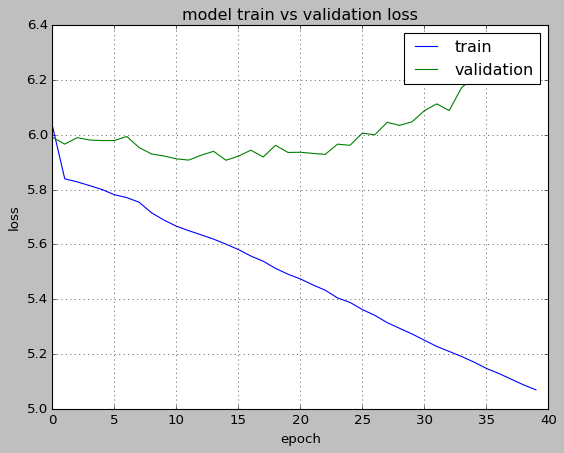

In [19]:
from matplotlib import pyplot

# history = model.fit(X, Y, epochs=100, validation_data=(valX, valY))
pyplot.style.use("classic")
pyplot.grid()
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()